In [0]:
#Setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.matcher import PhraseMatcher

In [6]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

covid_19_india_url="covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, dayfirst=True, parse_dates=["Date"])
Individual_Details_url="IndividualDetails.csv"
Individual_Details=pd.read_csv(Individual_Details_url, dayfirst=True, parse_dates=["diagnosed_date","status_change_date"])

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
  0% 0.00/188k [00:00<?, ?B/s]
100% 188k/188k [00:00<00:00, 60.1MB/s]
Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [7]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
covid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, dayfirst=True, parse_dates=["Date"])
Individual_Details_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/IndividualDetails.csv"
Individual_Details=pd.read_csv(Individual_Details_url, dayfirst=True, parse_dates=["diagnosed_date","status_change_date"])
"""

'\ncovid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"\ncovid_19_india=pd.read_csv(covid_19_india_url, dayfirst=True, parse_dates=["Date"])\nIndividual_Details_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/IndividualDetails.csv"\nIndividual_Details=pd.read_csv(Individual_Details_url, dayfirst=True, parse_dates=["diagnosed_date","status_change_date"])\n'

In [8]:
covid_19_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1666,1667,2020-05-06,8:00 AM,Telengana,-,-,585,29,1096
1667,1668,2020-05-06,8:00 AM,Tripura,-,-,2,0,43
1668,1669,2020-05-06,8:00 AM,Uttarakhand,-,-,39,1,61
1669,1670,2020-05-06,8:00 AM,Uttar Pradesh,-,-,987,56,2880
1670,1671,2020-05-06,8:00 AM,West Bengal,-,-,364,140,1344


In [9]:
#Reducing required data
case_details=pd.DataFrame(Individual_Details[["id","notes","detected_state","diagnosed_date"]])
case_details=case_details.loc[case_details.diagnosed_date<=pd.to_datetime('10/04/2020',format='%d/%m/%Y')]

case_details["category"]=[None]*len(case_details)
case_details[:15]

,id,notes,detected_state,diagnosed_date,category
0,0,Travelled from Wuhan,Kerala,2020-01-30,None
1,1,Travelled from Wuhan,Kerala,2020-02-02,None
2,2,Travelled from Wuhan,Kerala,2020-02-03,None
3,3,"Travelled from Austria, Italy",Delhi,2020-03-02,None
4,4,"Travelled from Dubai to Bangalore on 20th Feb,...",Telangana,2020-03-02,None
5,5,Travelled from Italy,Rajasthan,2020-03-03,None
6,6,Travelled from Italy,Haryana,2020-03-04,None
7,7,Travelled from Italy,Haryana,2020-03-04,None
8,8,Travelled from Italy,Haryana,2020-03-04,None
9,9,Travelled from Italy,Haryana,2020-03-04,None


In [10]:
#Classifying cases as Primary, Secondary & Tertiary
nlp = spacy.blank('en')
pmatcher = PhraseMatcher(nlp.vocab, attr='LOWER')
smatcher = PhraseMatcher(nlp.vocab, attr='LOWER')
tmatcher = PhraseMatcher(nlp.vocab, attr='LOWER')

terms1=["travelled","history","flown","foreign","travel"]
terms2=["family","accompanied","relative","neighbour","medical","tenant","contact","friends","wife","daughter","father","mother","son in law","co-passenger","co-passengers","cab driver","son","spouse","doctor of","of","contracted","boss","related","brother","cook","compounder","hospital","staff","sister","driver","airport","worked","worker","medical college","uncle","aunt","nurse","attended","husband","security","siblings","grandchildren","related","travel","cousin","attended","local transmission","mother&son","roommate",""]
terms3=["no travel history"]

test1=[nlp(text) for text in terms1]
test2=[nlp(text) for text in terms2]
test3=[nlp(text) for text in terms3]

pmatcher.add("Test_1", None, *test1)
smatcher.add("Test_2", None, *test2)
tmatcher.add("Test_3", None, *test3)

for i in range(len(case_details)):
  if(isinstance(case_details["notes"][i], float)):
    case_details["category"][i]="Tertiary"
    continue
  doc=nlp(case_details["notes"][i])
  pmatches = pmatcher(doc)
  smatches = smatcher(doc)
  tmatches = tmatcher(doc)
  if(tmatches):
    case_details["category"][i]="Tertiary"
    continue
  elif(pmatches):
    case_details["category"][i]="Primary"
    continue
  elif(smatches):
    case_details["category"][i]="Secondary"
    continue
  case_details["category"][i]="Tertiary"

case_details.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to b

,id,notes,detected_state,diagnosed_date,category
0,0,Travelled from Wuhan,Kerala,2020-01-30,Primary
1,1,Travelled from Wuhan,Kerala,2020-02-02,Primary
2,2,Travelled from Wuhan,Kerala,2020-02-03,Primary
3,3,"Travelled from Austria, Italy",Delhi,2020-03-02,Primary
4,4,"Travelled from Dubai to Bangalore on 20th Feb,...",Telangana,2020-03-02,Primary


In [11]:
#Identifying 5 states with maximum cases
Individual_Details=Individual_Details.loc[Individual_Details.diagnosed_date<=pd.to_datetime('10/04/2020',format='%d/%m/%Y')]
state_count=pd.DataFrame(Individual_Details.groupby("detected_state").id.count())
sorted_state_count=state_count.sort_values('id',ascending=False).reset_index()
sorted_state_count.head()

,detected_state,id
0,Maharashtra,1574
1,Tamil Nadu,911
2,Delhi,903
3,Rajasthan,561
4,Telangana,487


In [12]:
#Primary, Secondary and Tertiary data of states with top 5 cases
Solution=pd.DataFrame(case_details.loc[case_details.detected_state.isin(sorted_state_count.iloc[:5,0].tolist())].groupby(['detected_state', 'category']).id.count())
Solution

id
detected_state category       
Delhi          Primary      50
               Secondary     8
               Tertiary    845
Maharashtra    Primary      68
               Secondary    51
               Tertiary   1455
Rajasthan      Primary      85
               Secondary    55
               Tertiary    421
Tamil Nadu     Primary     554
               Secondary    46
               Tertiary    311
Telangana      Primary      43
               Secondary     7
               Tertiary    437

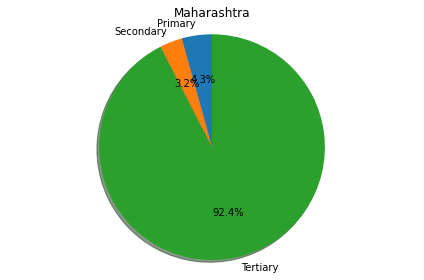

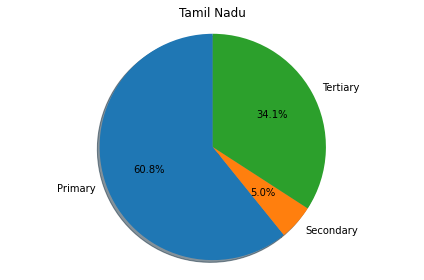

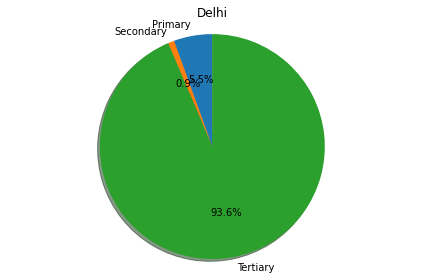

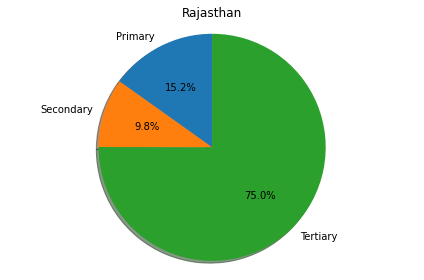

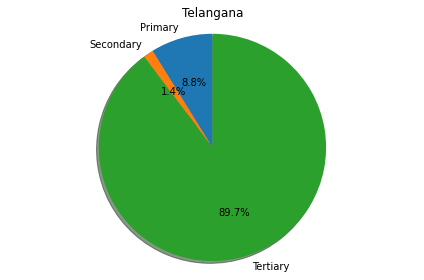

In [13]:
#Displaying data of the same
for i in sorted_state_count.iloc[:5,0].tolist():
  labels = Solution.loc[i].index
  sizes = Solution.loc[i]["id"]
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal') 
  plt.title(i) 
  plt.tight_layout()
  plt.show()